# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, ridge regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown block to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

car_prices = pd.read_csv('car_prices.csv')

#split into X and y
X = car_prices.drop(['Price (DKK)', 'Front-Wheel Drive'], axis=1)

Y = car_prices['Price (DKK)']

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.


### Task 1: Regression



Linear regression finds the best-fitting line (or hyperplane) by solving for the **coefficient vector** $\mathbf{B}$ that minimizes the squared error:

$$
\mathbf{B} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

where:
- $\mathbf{X}$ is the **design matrix**, including a column of ones for the intercept.
- $\mathbf{y}$ is the **response variable** (target values).
- $\mathbf{B}$ contains the **regression coefficients**.

**Explanation of Each Step**
1. **Construct the matrix $X$**:
   - Each **row** represents a data point.
   - Each **column** represents a feature.
   - The **first column is all ones** to account for the **intercept**.

2. **Solve for $\mathbf{B}$ using the normal equation**:
   - Compute $X^T X$ (feature correlation).
   - Compute $X^T y$ (cross-product with the target variable).
   - Compute the **inverse of $X^T X$** and multiply by $X^T y$ to get $\mathbf{B}$.

3. **Interpret the results**:
   - The **first value** in $\mathbf{B}$ is the **intercept**.
   - The remaining values are the **coefficients for each feature**.



In [3]:

import numpy as np

#add a new column of ones to X_train and X_test for the intercept
X_train_matrix = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_matrix = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

#Y_train to a vector column
Y_vector = Y_train.values.reshape(-1, 1) 

X= X_train_matrix
Y= Y_vector

XT = X.T
XTX = XT.dot(X)
XTX_inv = np.linalg.inv(XTX)
XTY = XT.dot(Y)

#solving B
B = XTX_inv.dot(XTY)


Task 2: Evaluating the Model

Once we have the regression coefficients $\mathbf{B}$, we can evaluate how well the model fits the data using two key metrics:

1. **Mean Squared Error (MSE)** – Measures the average squared difference between the predicted and actual values:
   $$
   MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$
   - Lower MSE means better fit.

2. **$R^2$ (Coefficient of Determination)** – Measures how much of the variance in $y$ is explained by $X$:
   $$
   R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
   $$
   - $R^2$ ranges from **0 to 1**, where **1** indicates a perfect fit and **0** means the model explains no variance.


**Explanation of Each Step**
1. **Compute Predictions**:  
   $$ \hat{y} = X B $$
   This gives the model’s predicted values.

2. **Compute MSE**:  
   - We square the residuals $ (y - \hat{y})^2 $ and take the mean.

3. **Compute $R^2$**:
   - **Total sum of squares** $ SS_{total} $ measures the total variance in $ y $.
   - **Residual sum of squares** $ SS_{residual} $ measures the variance left unexplained by the model.
   - $ R^2 $ tells us what fraction of variance is explained.

**Interpreting the Results**
- **MSE**: Lower values indicate a better fit.
- **$R^2$ Score**:
  - **$R^2 = 1$** → Perfect fit (all points on the regression line).
  - **$R^2 = 0$** → Model is no better than predicting the mean of $ y $.
  - **$R^2 < 0$** → Model performs worse than a simple average.

Implement the above steps using linear algebra so that you both create a regression model and calculate the MSE and $R^2$. Note, here you need to use `X_train`, `X_test`, `y_train` and `y_test` appropriately!


In [4]:
#compute the prediction
y_prediction = X_test_matrix.dot(B)

#calculate the mean squared error
mse = np.mean((Y_test.values.reshape(-1, 1) - y_prediction)**2)

#sum of squared residuals
ssr = np.sum((Y_test.values.reshape(-1, 1) - y_prediction)**2)

#total sum of squares
sst = np.sum((Y_test.values.reshape(-1, 1) - np.mean(Y_test.values.reshape(-1, 1)))**2)

#solving R^2
r_squared = 1 - ssr/sst

print('MSE: ', mse)
print('SSR: ', ssr)
print('SST: ', sst)
print('R^2: ', r_squared)

MSE:  2774486705.7872934
SSR:  3457010435410.968
SST:  25499150047764.055
R^2:  0.8644264444526415


# Part 2: Using Library Functions

### Task 4: Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


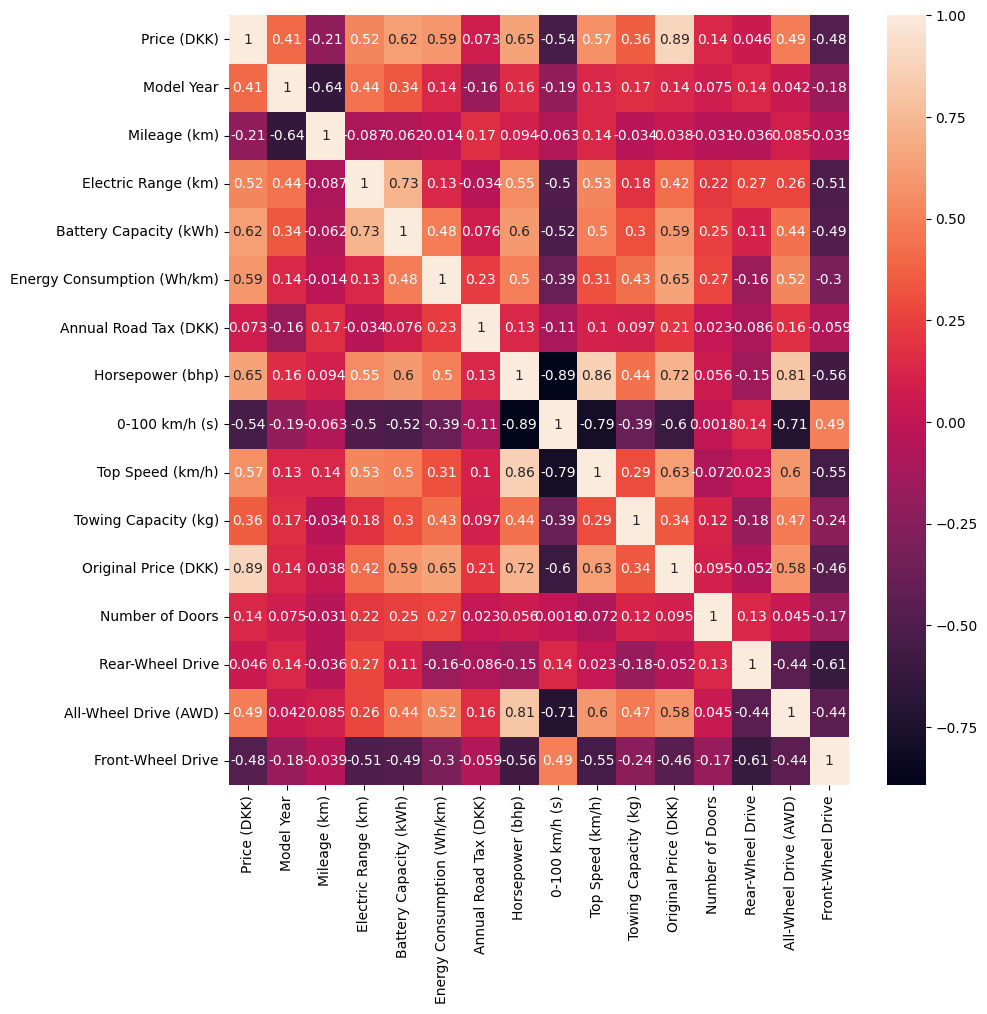

MSE: 2774486707.59
R^2: 0.86
RMSE: 52673.40


In [5]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


#Correlation metrix
correlation_matrix = car_prices.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#Ordinary Least Squares
ols = LinearRegression()
ols.fit(X_train, Y_train)
y_prediction = ols.predict(X_test)

#Perfirmance metrics
print(f'MSE: {mean_squared_error(Y_test, y_prediction):.2f}')
print(f'R^2: {r2_score(Y_test, y_prediction):.2f}')
print(f'RMSE: {root_mean_squared_error(Y_test, y_prediction):.2f}')

R sqrt represents the proportion of variance in the target variable explained by the model. The higher the R squared, the better the model fits the data.
An R² of 0.86 means 86% of the variation in car prices is captured by the model, while the remaining 14% is due to unexplained factors.

RMSE is the square root of the average of the squared differences between the predicted and actual values. It is a measure of the error of the model. The lower the RMSE, the better the model.

### Task 5: Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For the final task you must do the following
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(Y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(Y_test.values.reshape(-1, 1)).flatten()

In [7]:
#Ridge regression
from sklearn.linear_model import Ridge

alphas = 10**np.linspace(10,-2,100)*0.5
best_ridge, best_ridge_alpha = None, None
best_ridge_mse = float("inf")

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, max_iter=100000)
    ridge_model.fit(X_train_scaled, y_train_scaled)  
    mse = mean_squared_error(y_test_scaled, ridge_model.predict(X_test_scaled))
    
    if mse < best_ridge_mse:
        best_ridge_mse = mse
        best_ridge = ridge_model
        best_ridge_alpha = alpha

print(f'Best Ridge alpha: {best_ridge_alpha:.2f}')
print(f'Best Ridge MSE: {best_ridge_mse:.2f}')
print(f'Best Ridge R^2: {best_ridge.score(X_test_scaled, y_test_scaled):.2f}')


Best Ridge alpha: 0.01
Best Ridge MSE: 0.13
Best Ridge R^2: 0.86


In [8]:
#Lasso regression
from sklearn.linear_model import Lasso

alphas = 10**np.linspace(10,-2,100)*0.5
best_lasso, best_lasso_alpha = None, None
best_lasso_mse = float("inf")

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=100000)
    lasso_model.fit(X_train_scaled, y_train_scaled)  
    mse = mean_squared_error(y_test_scaled, lasso_model.predict(X_test_scaled))
    
    if mse < best_lasso_mse:
        best_lasso_mse = mse
        best_lasso = lasso_model
        best_lasso_alpha = alpha

print(f'Best lasso alpha: {best_lasso_alpha:.2f}')
print(f'Best lasso MSE: {best_lasso_mse:.2f}')
print(f'Best lasso R^2: {best_lasso.score(X_test_scaled, y_test_scaled):.2f}')


Best lasso alpha: 0.01
Best lasso MSE: 0.12
Best lasso R^2: 0.87


In [9]:
#ElasticNet regression
from sklearn.linear_model import ElasticNet

aplhas = 10**np.linspace(10,-2,100)*0.5
best_elastic, best_elastic_alpha = None, None
best_elastic_mse = float("inf")

for alpha in alphas:
    elastic_model = ElasticNet(alpha=alpha, max_iter=100000)
    elastic_model.fit(X_train_scaled, y_train_scaled)  
    mse = mean_squared_error(y_test_scaled, elastic_model.predict(X_test_scaled))
    
    if mse < best_elastic_mse:
        best_elastic_mse = mse
        best_elastic = elastic_model
        best_elastic_alpha = alpha

print(f'Best ElasticNet alpha: {best_elastic_alpha:.2f}') 
print(f'Best ElasticNet MSE: {best_elastic_mse:.2f}')
print(f'Best ElasticNet R^2: {best_elastic.score(X_test_scaled, y_test_scaled):.2f}')

Best ElasticNet alpha: 0.02
Best ElasticNet MSE: 0.12
Best ElasticNet R^2: 0.87


Discussions and conclusions

Lasso and Elastic Net show the best performance, as they both have the lowest MSE (0.12) and the highest R^2 (0.88). 
Ridge regression has a slightly higher MSE (0.13) and a lower R^2 (0.87).
Therefore, Lasso and Elastic Net are the best models for predicting car prices in this dataset.

In [10]:
#Rebuilding Ordinary Least Squares
ols = LinearRegression()
ols.fit(X_train_scaled, y_train_scaled)
y_prediction = ols.predict(X_test_scaled)

coefficients = pd.DataFrame(ols.coef_, X_train.columns, columns=["Coefficient"])
print(coefficients)

                            Coefficient
Model Year                     0.167978
Mileage (km)                  -0.103210
Electric Range (km)            0.070606
Battery Capacity (kWh)         0.005387
Energy Consumption (Wh/km)     0.018162
Annual Road Tax (DKK)         -0.062728
Horsepower (bhp)               0.017988
0-100 km/h (s)                 0.077022
Top Speed (km/h)               0.025581
Towing Capacity (kg)           0.047491
Original Price (DKK)           0.850039
Number of Doors                0.011149
Rear-Wheel Drive               0.036051
All-Wheel Drive (AWD)         -0.004247


Interpretation of the coefficients: 
The coefficients represent the change in the target variable for a one-unit change in the predictor variable, while the other variables are held constant.

For example, the "Model year" coefficient of 0.17 means that for every one-unit increase in the model year, the car price increases by 0.17 standard deviations.

The "Horsepower" coefficient of 0.12 means that for every one-unit increase in horsepower, the car price increases by 0.12 standard deviations.

In [11]:
print(f'MSE: {mean_squared_error(y_test_scaled, y_prediction):.2f}')
print(f'R^2: {r2_score(y_test_scaled, y_prediction):.2f}')

MSE: 0.13
R^2: 0.86


In [12]:
#Ridge
ridge_coefficients = pd.DataFrame(best_ridge.coef_, X_train.columns, columns=["Coefficient"])
print("Ridge coefficients: ")
print(ridge_coefficients.sort_values(by="Coefficient", ascending=False).head(5))
print("\n")

#Lasso
lasso_coefficients = pd.DataFrame(best_lasso.coef_, X_train.columns, columns=["Coefficient"])
print("Lasso coefficients: ")
print(lasso_coefficients.sort_values(by="Coefficient", ascending=False).head(5))
print("\n")

#OLS
print("OLS coefficients: ")
print(coefficients.sort_values(by="Coefficient", ascending=False).head(5))

Ridge coefficients: 
                      Coefficient
Original Price (DKK)     0.850036
Model Year               0.167977
0-100 km/h (s)           0.077022
Electric Range (km)      0.070606
Towing Capacity (kg)     0.047491


Lasso coefficients: 
                      Coefficient
Original Price (DKK)     0.844196
Model Year               0.168898
Electric Range (km)      0.065105
Towing Capacity (kg)     0.036775
Rear-Wheel Drive         0.034325


OLS coefficients: 
                      Coefficient
Original Price (DKK)     0.850039
Model Year               0.167978
0-100 km/h (s)           0.077022
Electric Range (km)      0.070606
Towing Capacity (kg)     0.047491


The Ridge and OLS models agree that the most important features are Original Price, Model Year, 0-100 km/h, Electric Range, and Towing Capacity. However, the Lasso model considers the most important features to be Original Price, Model Year, Electric Range, Towing Capacity, and Rear-Mheel Drive. The Lasso model does not consider 0-100 km/h to be an important feature, which is different from the Ridge and OLS models.